In [53]:
from selenium import webdriver
import pandas as pd 
from bs4 import BeautifulSoup

In [54]:
chromedriver = "C:\\Users\\Younis Saeed\\Downloads\\selem\\chromedriver"
driver = webdriver.Chrome(chromedriver)


In [55]:
df = pd.DataFrame(columns=["Title","Locations","Company","Salary","Sponsored","Descroption"])

In [41]:
for i in range(0,500,10):
    driver.get("https://eg.indeed.com/jobs?q=data+science&l=egypt&start="+str(i))
    driver.implicitly_wait(4)
    all_jobs = driver.find_elements_by_class_name('result')


In [42]:
for job in all_jobs:
    result_html = job.get_attribute('innerHTML')
    soup = BeautifulSoup(result_html , 'html.parser')
    try:
        title = soup.find("a",class_="jobtitle").text.replace('\n','')
    except:
        title = 'None'
    try:
        location = soup.find(class_="location").text
    except:
        location = 'None'
    try:
        company = soup.find(class_="company").text.replace("\n","").strip()
    except:
        company = 'None'
    try:
        salary = soup.find(class_="salary").text.replace("\n","").strip()
    except:
        salary = 'None'
    try:
        sponsored = soup.find(class_="sponsoredGray").text
        sponsored = "Sponsored"
    except:
        sponsored = "Organic"
        
    sum_div = job.find_elements_by_class_name("summary")[0]
    try:
        sum_div.click()
    except:
        close_button = driver.find_elements_by_class_name('popover-x-button-close')
        close_button().click()
        sum_div.click()
    job_desc = driver.find_elements_by_class_name("location")
    
    df = df.append({'Title':title,"Location":location,"Company":company,
                    "Sponsored":sponsored,"Description":job_desc},
                  ignore_index=True)
        

In [44]:
df.to_csv("datascience.csv")

In [52]:
#### machine jobs 

In [56]:
for i in range(0,500,10):
    driver.get("https://eg.indeed.com/%D9%88%D8%B8%D8%A7%D8%A6%D9%81?q=machine+learning&l=egypt&start="+str(i))
    driver.implicitly_wait(4)
    all_jobs = driver.find_elements_by_class_name('result')


In [57]:
for job in all_jobs:
    result_html = job.get_attribute('innerHTML')
    soup = BeautifulSoup(result_html , 'html.parser')
    try:
        title = soup.find("a",class_="jobtitle").text.replace('\n','')
    except:
        title = 'None'
    try:
        location = soup.find(class_="location").text
    except:
        location = 'None'
    try:
        company = soup.find(class_="company").text.replace("\n","").strip()
    except:
        company = 'None'
    try:
        salary = soup.find(class_="salary").text.replace("\n","").strip()
    except:
        salary = 'None'
    try:
        sponsored = soup.find(class_="sponsoredGray").text
        sponsored = "Sponsored"
    except:
        sponsored = "Organic"
        
    sum_div = job.find_elements_by_class_name("summary")[0]
    try:
        sum_div.click()
    except:
        close_button = driver.find_elements_by_class_name('popover-x-button-close')
        close_button().click()
        sum_div.click()
    job_desc = driver.find_elements_by_class_name("location")
    
    df = df.append({'Title':title,"Location":location,"Company":company,
                    "Sponsored":sponsored,"Description":job_desc},
                  ignore_index=True)
        

In [58]:
df.to_csv("machinelearning.csv")

In [59]:
######### starting analysis

In [60]:
import numpy as np
import matplotlib.pyplot as plt

In [62]:
df1 = pd.read_csv("datascience.csv",encoding="utf-8")
df2 = pd.read_csv("machinelearning.csv",encoding="utf-8")

data = pd.concat([df1,df2],axis=0).drop_duplicates()

In [63]:
data.shape

(25, 9)

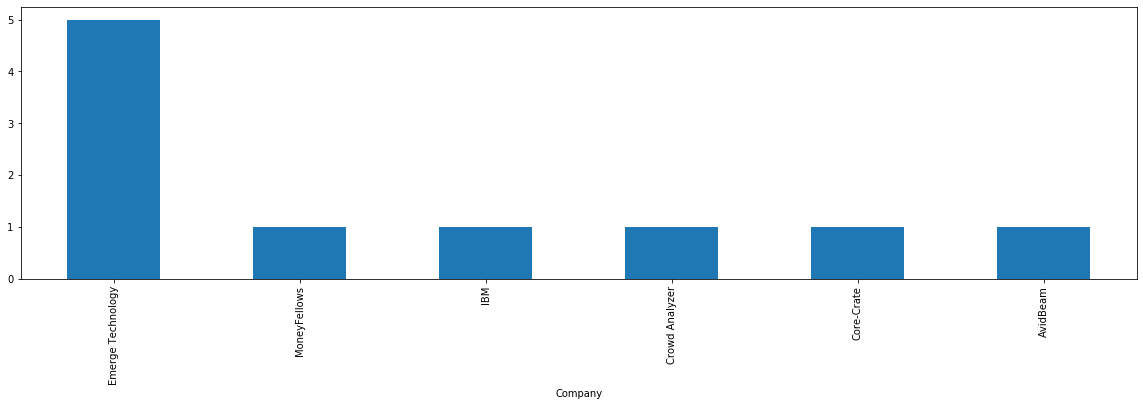

In [64]:
counts = df.groupby("Company").count()["Title"].sort_values(ascending=False)[:20]
counts.plot("bar",figsize=(20,5))